### Import Libraries and Configurations


In [1]:

import pandas as pd
pd.options.display.max_columns = None

import altair as alt
alt.renderers.enable('mimetype')

from vega_datasets import data
import vega

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

### Read data, join multiple datasets, general statistics before cleaning 
- Look for any null values in the dataset
- clean up column name
- join other dataset to give more information

In [2]:
# Reading in the main dataframe (cause of death)
df=pd.read_csv('cause_of_deaths.csv')
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [3]:
# Basic Stats about the cause of death dataframe
print("Shape:", df.shape)
print("Unique Countries:",df['Country/Territory'].nunique())
print("Null Elements: ", df.isna().sum().sum())
print("Earliest Year: ", df['Year'].min())
print("Latest Year: ", df['Year'].max())
print("Number of Causes of deaths: ", df.shape[1]-3)

Shape: (6120, 34)
Unique Countries: 204
Null Elements:  0
Earliest Year:  1990
Latest Year:  2019
Number of Causes of deaths:  31


In [4]:
# Read in UID dataframe which contains each country's Unique Identifer and Lat and Long 
country_data = pd.read_csv("UID.csv")
country_data=country_data[country_data['Province_State'].isnull()][['UID','Country_Region','Lat','Long_']]
country_data.loc[country_data['Country_Region'] == "US",'Country_Region'] = "United States"
country_data.head()

,UID,Country_Region,Lat,Long_
0,4,Afghanistan,33.93911,67.709953
1,8,Albania,41.15330,20.168300
2,10,Antarctica,-71.94990,23.347000
3,12,Algeria,28.03390,1.659600
4,20,Andorra,42.50630,1.521800


In [5]:
# Merge cause_of_deaths dataframe with UID dataframe 
df=pd.merge(left=df,right=country_data,left_on="Country/Territory",right_on="Country_Region")


In [6]:

# Data cleaning on the dataframe by make the column names more consistent
df.columns = list(map(lambda x: x.replace(' ', '_').replace('/','_').replace("'","").replace(",",""),
                                 df.columns))
df.drop(columns=['Country_Region',],inplace=True)
df.rename(columns={'Long_':'Long'},inplace=True)
df.head()                                 


,Country_Territory,Code,Year,Meningitis,Alzheimers_Disease_and_Other_Dementias,Parkinsons_Disease,Nutritional_Deficiencies,Malaria,Drowning,Interpersonal_Violence,Maternal_Disorders,HIV_AIDS,Drug_Use_Disorders,Tuberculosis,Cardiovascular_Diseases,Lower_Respiratory_Infections,Neonatal_Disorders,Alcohol_Use_Disorders,Self-harm,Exposure_to_Forces_of_Nature,Diarrheal_Diseases,Environmental_Heat_and_Cold_Exposure,Neoplasms,Conflict_and_Terrorism,Diabetes_Mellitus,Chronic_Kidney_Disease,Poisonings,Protein-Energy_Malnutrition,Road_Injuries,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,UID,Lat,Long
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985,4,33.93911,67.709953
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092,4,33.93911,67.709953
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325,4,33.93911,67.709953
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601,4,33.93911,67.709953
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816,4,33.93911,67.709953


In [7]:
# After merging, we get 184 that has country UID, down from 204
print("Unique Countries:",df['Country_Territory'].nunique())

Unique Countries: 184


### Question 1: How are the terrorist attacks in the US starting the year 2001 affects the death counts in the US and Afghanistan?
 - What are the differences in terms of United States's death from terrorism over the years
 - What are the differences in terms of Afghanistan's death from terrorism over the years
 - Visualize the numbers using Altair map


In [8]:

USA_Terrorism =df.loc[(df.Country_Territory=="United States") & (df.Year>=2000)][['Year','Conflict_and_Terrorism']].sort_values('Year').reset_index(drop=True)
USA_Terrorism["USA_Difference"] = USA_Terrorism['Conflict_and_Terrorism'].diff()
USA_Terrorism.rename(columns={'Conflict_and_Terrorism':'USA_Conflict_and_Terrorism'},inplace=True)

Afghanistan=df.loc[(df.Country_Territory=="Afghanistan") & (df.Year>=2000)][['Year','Conflict_and_Terrorism']].sort_values('Year').reset_index(drop=True)
Afghanistan["Afghanistan_Difference"] = Afghanistan['Conflict_and_Terrorism'].diff()
Afghanistan.rename(columns={'Conflict_and_Terrorism':'Afghanistan_Conflict_and_Terrorism'},inplace=True)


In [9]:
Terrorism=pd.merge(left=USA_Terrorism,right=Afghanistan,left_on="Year",right_on="Year")
Terrorism

,Year,USA_Conflict_and_Terrorism,USA_Difference,Afghanistan_Conflict_and_Terrorism,Afghanistan_Difference
0,2000,41,NaN,5429,NaN
1,2001,4279,4238.0,5689,260.0
2,2002,66,-4213.0,977,-4712.0
3,2003,538,472.0,864,-113.0
4,2004,927,389.0,1049,185.0
5,2005,969,42.0,2114,1065.0
6,2006,948,-21.0,5677,3563.0
7,2007,1031,83.0,8220,2543.0
8,2008,487,-544.0,6895,-1325.0
9,2009,502,15.0,7617,722.0


In [10]:
def display_map(year,column_name):
    df1 = df.loc[df.Year==year].reset_index()
    source = alt.topo_feature(data.world_110m.url, "countries")
    background = alt.Chart(source).mark_geoshape(fill="white").interactive()

    color=column_name+":N"
    tooltip=column_name+":Q"

    foreground = (
        alt.Chart(source).mark_geoshape(
            stroke="black", strokeWidth=0.15
        ).encode(
            color=alt.Color(
                color, scale=alt.Scale(scheme="lightgreyred"), legend=None
                #legend=alt.Legend(type='gradient',title='Legend',gradientLength=100,direction="horizontal", orient='bottom'),
            ),
            tooltip=[
                alt.Tooltip("Country_Territory:N", title="Country"),
                alt.Tooltip(tooltip, title=column_name),
            ],
        ).transform_lookup(
            lookup="id",
            from_=alt.LookupData(df1, "UID", [column_name, "Country_Territory"]),
        ).interactive()
    )

    chart = (
        (background + foreground)
        .configure_view(strokeWidth=0)
        .properties(title=str(year)+ " Deaths Due to " + column_name.replace('_',' ') + " World Map",width=700, height=400)
        .project("naturalEarth1")
    )

    return chart

In [11]:
display_map(2000,'Conflict_and_Terrorism')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [12]:
display_map(2001,'Conflict_and_Terrorism')


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [13]:
display_map(2002,'Conflict_and_Terrorism')


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### What diseases in the United States have greater rate than the population growth rate?

In [14]:
# Read in US population dataframe
us_population = pd.read_csv("US_population.csv")
us_population.head()

,Year,Population
0,1990,249623000
1,1991,252981000
2,1992,256514000
3,1993,259919000
4,1994,263126000


In [15]:
# Join the main dataset that is just United States with US population dataframe
US = df.loc[df.Country_Territory=="United States"].sort_values(by=['Year'])
US = pd.merge(left=US,right=us_population,on="Year")
US.head()

,Country_Territory,Code,Year,Meningitis,Alzheimers_Disease_and_Other_Dementias,Parkinsons_Disease,Nutritional_Deficiencies,Malaria,Drowning,Interpersonal_Violence,Maternal_Disorders,HIV_AIDS,Drug_Use_Disorders,Tuberculosis,Cardiovascular_Diseases,Lower_Respiratory_Infections,Neonatal_Disorders,Alcohol_Use_Disorders,Self-harm,Exposure_to_Forces_of_Nature,Diarrheal_Diseases,Environmental_Heat_and_Cold_Exposure,Neoplasms,Conflict_and_Terrorism,Diabetes_Mellitus,Chronic_Kidney_Disease,Poisonings,Protein-Energy_Malnutrition,Road_Injuries,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,UID,Lat,Long,Population
0,United States,USA,1990,1830,73079,12895,2795,0,4370,25341,538,27789,5865,2271,879646,72716,19306,6763,33964,230,681,1468,539139,21,47140,33101,1330,2419,48970,106098,37386,78301,5336,202,840,40.0,-100.0,249623000
1,United States,USA,1991,1615,78365,13217,2855,0,4246,26081,525,32425,6151,2172,877798,73655,18307,6868,34014,124,746,1406,544760,159,49037,33885,1282,2481,47833,109587,37417,78694,5204,210,840,40.0,-100.0,252981000
2,United States,USA,1992,1558,83053,13600,2945,0,4069,25307,509,36485,6596,2055,874992,74500,17259,7035,34067,123,816,1371,550919,78,51045,34919,1225,2569,46690,113036,37599,79310,4878,221,840,40.0,-100.0,256514000
3,United States,USA,1993,1550,87768,14301,3148,0,4075,25598,511,40523,7269,1986,895086,77518,16700,7200,34893,254,925,1635,565698,72,54543,36767,1216,2748,47119,119371,38715,81626,5100,232,840,40.0,-100.0,259919000
4,United States,USA,1994,1530,91491,14816,3312,0,3999,24898,524,44959,7862,1877,899691,78885,15899,7347,35122,303,1034,1416,573321,44,57260,38199,1192,2900,47262,123547,39290,82913,4794,243,840,40.0,-100.0,263126000


In [16]:
# Get rid of unwanted columns with list comprehension
col_names = US.columns.tolist()
unwanted = ['Code','Year',"Country_Territory","UID","Lat",'Long']
col_names = [ele for ele in col_names if ele not in unwanted]


In [17]:
# Convert each disease column to percent change
for name in col_names:
    name_perchange = name+"_PerChange"
    US[name_perchange] = round(US[name].pct_change()*100,2)
    US=US.drop([name],axis=1)

In [18]:
# Drop columns 
US_Disease_Per = US.drop(['Code',"Country_Territory","UID","Lat",'Long'],axis=1)
US_Disease_Per.head()


,Year,Meningitis_PerChange,Alzheimers_Disease_and_Other_Dementias_PerChange,Parkinsons_Disease_PerChange,Nutritional_Deficiencies_PerChange,Malaria_PerChange,Drowning_PerChange,Interpersonal_Violence_PerChange,Maternal_Disorders_PerChange,HIV_AIDS_PerChange,Drug_Use_Disorders_PerChange,Tuberculosis_PerChange,Cardiovascular_Diseases_PerChange,Lower_Respiratory_Infections_PerChange,Neonatal_Disorders_PerChange,Alcohol_Use_Disorders_PerChange,Self-harm_PerChange,Exposure_to_Forces_of_Nature_PerChange,Diarrheal_Diseases_PerChange,Environmental_Heat_and_Cold_Exposure_PerChange,Neoplasms_PerChange,Conflict_and_Terrorism_PerChange,Diabetes_Mellitus_PerChange,Chronic_Kidney_Disease_PerChange,Poisonings_PerChange,Protein-Energy_Malnutrition_PerChange,Road_Injuries_PerChange,Chronic_Respiratory_Diseases_PerChange,Cirrhosis_and_Other_Chronic_Liver_Diseases_PerChange,Digestive_Diseases_PerChange,Fire_Heat_and_Hot_Substances_PerChange,Acute_Hepatitis_PerChange,Population_PerChange
0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,-11.75,7.23,2.50,2.15,NaN,-2.84,2.92,-2.42,16.68,4.88,-4.36,-0.21,1.29,-5.17,1.55,0.15,-46.09,9.54,-4.22,1.04,657.14,4.02,2.37,-3.61,2.56,-2.32,3.29,0.08,0.50,-2.47,3.96,1.35
2,1992,-3.53,5.98,2.90,3.15,NaN,-4.17,-2.97,-3.05,12.52,7.23,-5.39,-0.32,1.15,-5.72,2.43,0.16,-0.81,9.38,-2.49,1.13,-50.94,4.09,3.05,-4.45,3.55,-2.39,3.15,0.49,0.78,-6.26,5.24,1.40
3,1993,-0.51,5.68,5.15,6.89,NaN,0.15,1.15,0.39,11.07,10.20,-3.36,2.30,4.05,-3.24,2.35,2.42,106.50,13.36,19.26,2.68,-7.69,6.85,5.29,-0.73,6.97,0.92,5.60,2.97,2.92,4.55,4.98,1.33
4,1994,-1.29,4.24,3.60,5.21,NaN,-1.87,-2.73,2.54,10.95,8.16,-5.49,0.51,1.76,-4.80,2.04,0.66,19.29,11.78,-13.39,1.35,-38.89,4.98,3.89,-1.97,5.53,0.30,3.50,1.49,1.58,-6.00,4.74,1.23


In [19]:
US_Disease_Per=US_Disease_Per.loc[US_Disease_Per.Year!=1990]
US_Disease_Per.drop(columns=['Malaria_PerChange','Year'],inplace=True)
US_Disease_Per.head()

,Meningitis_PerChange,Alzheimers_Disease_and_Other_Dementias_PerChange,Parkinsons_Disease_PerChange,Nutritional_Deficiencies_PerChange,Drowning_PerChange,Interpersonal_Violence_PerChange,Maternal_Disorders_PerChange,HIV_AIDS_PerChange,Drug_Use_Disorders_PerChange,Tuberculosis_PerChange,Cardiovascular_Diseases_PerChange,Lower_Respiratory_Infections_PerChange,Neonatal_Disorders_PerChange,Alcohol_Use_Disorders_PerChange,Self-harm_PerChange,Exposure_to_Forces_of_Nature_PerChange,Diarrheal_Diseases_PerChange,Environmental_Heat_and_Cold_Exposure_PerChange,Neoplasms_PerChange,Conflict_and_Terrorism_PerChange,Diabetes_Mellitus_PerChange,Chronic_Kidney_Disease_PerChange,Poisonings_PerChange,Protein-Energy_Malnutrition_PerChange,Road_Injuries_PerChange,Chronic_Respiratory_Diseases_PerChange,Cirrhosis_and_Other_Chronic_Liver_Diseases_PerChange,Digestive_Diseases_PerChange,Fire_Heat_and_Hot_Substances_PerChange,Acute_Hepatitis_PerChange,Population_PerChange
1,-11.75,7.23,2.50,2.15,-2.84,2.92,-2.42,16.68,4.88,-4.36,-0.21,1.29,-5.17,1.55,0.15,-46.09,9.54,-4.22,1.04,657.14,4.02,2.37,-3.61,2.56,-2.32,3.29,0.08,0.50,-2.47,3.96,1.35
2,-3.53,5.98,2.90,3.15,-4.17,-2.97,-3.05,12.52,7.23,-5.39,-0.32,1.15,-5.72,2.43,0.16,-0.81,9.38,-2.49,1.13,-50.94,4.09,3.05,-4.45,3.55,-2.39,3.15,0.49,0.78,-6.26,5.24,1.40
3,-0.51,5.68,5.15,6.89,0.15,1.15,0.39,11.07,10.20,-3.36,2.30,4.05,-3.24,2.35,2.42,106.50,13.36,19.26,2.68,-7.69,6.85,5.29,-0.73,6.97,0.92,5.60,2.97,2.92,4.55,4.98,1.33
4,-1.29,4.24,3.60,5.21,-1.87,-2.73,2.54,10.95,8.16,-5.49,0.51,1.76,-4.80,2.04,0.66,19.29,11.78,-13.39,1.35,-38.89,4.98,3.89,-1.97,5.53,0.30,3.50,1.49,1.58,-6.00,4.74,1.23
5,-1.05,3.68,4.17,6.58,-0.80,-5.71,-6.68,0.56,7.68,-5.11,1.03,1.95,-5.39,1.86,0.25,-56.11,13.15,34.96,1.58,331.82,5.03,4.57,-2.60,7.00,0.61,3.73,1.86,1.79,-2.21,5.76,1.20


In [20]:
US_Disease_Per_mean = US_Disease_Per.mean()
US_Disease_Per_mean=pd.DataFrame(US_Disease_Per_mean,columns=['Average'])
US_Disease_Per_mean = US_Disease_Per_mean.rename_axis('Disease').reset_index()
US_Disease_Per_mean.sort_values(by=['Average'],ascending=False)

,Disease,Average
19,Conflict_and_Terrorism_PerChange,459.506552
15,Exposure_to_Forces_of_Nature_PerChange,81.602069
16,Diarrheal_Diseases_PerChange,10.689310
8,Drug_Use_Disorders_PerChange,8.746207
21,Chronic_Kidney_Disease_PerChange,4.137931
2,Parkinsons_Disease_PerChange,3.213103
23,Protein-Energy_Malnutrition_PerChange,3.066552
3,Nutritional_Deficiencies_PerChange,2.779655
25,Chronic_Respiratory_Diseases_PerChange,2.632759
13,Alcohol_Use_Disorders_PerChange,2.561724


In [21]:
US_Disease_Per_mean = US_Disease_Per_mean.loc[US_Disease_Per_mean.Average>=0.950345].sort_values(by=['Average'],ascending=False).reset_index(drop=True)
US_Disease_Per_mean

,Disease,Average
0,Conflict_and_Terrorism_PerChange,459.506552
1,Exposure_to_Forces_of_Nature_PerChange,81.602069
2,Diarrheal_Diseases_PerChange,10.689310
3,Drug_Use_Disorders_PerChange,8.746207
4,Chronic_Kidney_Disease_PerChange,4.137931
5,Parkinsons_Disease_PerChange,3.213103
6,Protein-Energy_Malnutrition_PerChange,3.066552
7,Nutritional_Deficiencies_PerChange,2.779655
8,Chronic_Respiratory_Diseases_PerChange,2.632759
9,Alcohol_Use_Disorders_PerChange,2.561724


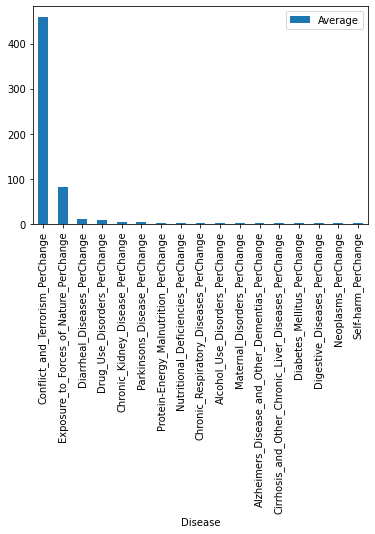

In [22]:
US_Disease_Per_mean.plot.bar(x='Disease',y='Average');

### Given all the diseases and u

In [ ]:
### What diseases in the United States have greater rate than the population growth rate?